In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn


from google.colab import files
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder

uploaded = files.upload()

datas = pd.read_csv("indeks-standar-pencemar-udara-di-spku-dataset.csv")



Saving indeks-standar-pencemar-udara-di-spku-dataset.csv to indeks-standar-pencemar-udara-di-spku-dataset.csv


In [ ]:
datas

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-01-01,DKI1 (Bunderan HI),30,20,10,32,9,32.0,O3,BAIK
1,2020-01-02,DKI1 (Bunderan HI),27,22,12,29,8,29.0,O3,BAIK
2,2020-01-03,DKI1 (Bunderan HI),39,22,14,32,10,39.0,PM10,BAIK
3,2020-01-04,DKI1 (Bunderan HI),34,22,14,38,10,38.0,O3,BAIK
4,2020-01-05,DKI1 (Bunderan HI),35,22,12,31,9,35.0,PM10,BAIK
...,...,...,...,...,...,...,...,...,...,...
1825,2020-12-27,DKI5 (Kebon Jeruk) Jakarta Barat,18,32,4,41,---,41.0,CO,BAIK
1826,2020-12-28,DKI5 (Kebon Jeruk) Jakarta Barat,22,33,5,35,3,35.0,CO,BAIK
1827,2020-12-29,DKI5 (Kebon Jeruk) Jakarta Barat,15,28,4,27,---,28.0,PM25,BAIK
1828,2020-12-30,DKI5 (Kebon Jeruk) Jakarta Barat,16,7,3,21,2,21.0,CO,BAIK


berdasarkan pengamatan saya ada beberapa data yang kosong dengan value: ---. oleh karena itu, data yang mengandung value tersebut akan saya hapus agar tidak mempengaruhi hasil akhir.

In [ ]:
datas = datas[datas["no2"].str.contains("---") == False]
datas = datas[datas["pm10"].str.contains("---") == False]
datas = datas[datas["so2"].str.contains("---") == False]
datas = datas[datas["co"].str.contains("---") == False]
datas = datas[datas["o3"].str.contains("---") == False]
datas = datas[datas["categori"].str.contains("---") == False]
datas = datas[datas["critical"].str.contains("---") == False]
datas

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-01-01,DKI1 (Bunderan HI),30,20,10,32,9,32.0,O3,BAIK
1,2020-01-02,DKI1 (Bunderan HI),27,22,12,29,8,29.0,O3,BAIK
2,2020-01-03,DKI1 (Bunderan HI),39,22,14,32,10,39.0,PM10,BAIK
3,2020-01-04,DKI1 (Bunderan HI),34,22,14,38,10,38.0,O3,BAIK
4,2020-01-05,DKI1 (Bunderan HI),35,22,12,31,9,35.0,PM10,BAIK
...,...,...,...,...,...,...,...,...,...,...
1822,2020-12-24,DKI5 (Kebon Jeruk) Jakarta Barat,29,31,9,28,2,31.0,PM25,BAIK
1823,2020-12-25,DKI5 (Kebon Jeruk) Jakarta Barat,24,27,7,18,3,27.0,PM25,BAIK
1826,2020-12-28,DKI5 (Kebon Jeruk) Jakarta Barat,22,33,5,35,3,35.0,CO,BAIK
1828,2020-12-30,DKI5 (Kebon Jeruk) Jakarta Barat,16,7,3,21,2,21.0,CO,BAIK


In [ ]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1673 entries, 0 to 1829
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   1673 non-null   object 
 1   stasiun   1673 non-null   object 
 2   pm10      1673 non-null   object 
 3   so2       1673 non-null   object 
 4   co        1673 non-null   object 
 5   o3        1673 non-null   object 
 6   no2       1673 non-null   object 
 7   max       1673 non-null   float64
 8   critical  1673 non-null   object 
 9   categori  1673 non-null   object 
dtypes: float64(1), object(9)
memory usage: 143.8+ KB


menghapus kolom tanggal dan stasiun

In [ ]:
datas = datas.drop(["tanggal", "stasiun"], axis = 1)

datas

,pm10,so2,co,o3,no2,max,critical,categori
0,30,20,10,32,9,32.0,O3,BAIK
1,27,22,12,29,8,29.0,O3,BAIK
2,39,22,14,32,10,39.0,PM10,BAIK
3,34,22,14,38,10,38.0,O3,BAIK
4,35,22,12,31,9,35.0,PM10,BAIK
...,...,...,...,...,...,...,...,...
1822,29,31,9,28,2,31.0,PM25,BAIK
1823,24,27,7,18,3,27.0,PM25,BAIK
1826,22,33,5,35,3,35.0,CO,BAIK
1828,16,7,3,21,2,21.0,CO,BAIK


Mengubah data string pada kolom "critical" dan "categori" menjadi data numerikal

In [ ]:
le = LabelEncoder()
label_crit = le.fit_transform(datas['critical'])


In [ ]:
label_crit

array([2, 2, 3, ..., 0, 0, 0])

In [ ]:
datas.drop("critical", axis=1, inplace=True)


In [ ]:
datas["critical"] = label_crit

datas.head()

,pm10,so2,co,o3,no2,max,categori,critical
0,30,20,10,32,9,32.0,BAIK,2
1,27,22,12,29,8,29.0,BAIK,2
2,39,22,14,32,10,39.0,BAIK,3
3,34,22,14,38,10,38.0,BAIK,2
4,35,22,12,31,9,35.0,BAIK,3


In [ ]:
swap_list = ["pm10","so2","co","o3","no2","max","critical","categori"]
datas = datas.reindex(columns=swap_list)
datas

,pm10,so2,co,o3,no2,max,critical,categori
0,30,20,10,32,9,32.0,2,BAIK
1,27,22,12,29,8,29.0,2,BAIK
2,39,22,14,32,10,39.0,3,BAIK
3,34,22,14,38,10,38.0,2,BAIK
4,35,22,12,31,9,35.0,3,BAIK
...,...,...,...,...,...,...,...,...
1822,29,31,9,28,2,31.0,4,BAIK
1823,24,27,7,18,3,27.0,4,BAIK
1826,22,33,5,35,3,35.0,0,BAIK
1828,16,7,3,21,2,21.0,0,BAIK


In [ ]:
from sklearn import metrics
def devided_data(datas, name_colums=['pm10','so2','co','o3','no2','max','critical']):
  ciri = datas[name_colums]
  label = datas[['categori']]
  return ciri,label

ciri,label = devided_data(datas)

Ciri_train, Ciri_test, Label_train, Label_test = train_test_split(ciri, label, test_size = 0.20, random_state = 0)

start_nn = 1
end_nn = 15
nn =[]
scores = []

for i in range(start_nn, end_nn+1):
  if i % 2 != 0:
    nn.append(i)
for j in nn:
  classifier = KNeighborsClassifier(n_neighbors = j, metric='minkowski', p = 2)
  classifier.fit(Ciri_train, Label_train.values.ravel())
  Pred = classifier.predict(Ciri_test)
  scores.append(metrics.accuracy_score(Label_test, Pred))
  cm = confusion_matrix(Label_test, Pred)


In [ ]:
Ciri_test

,pm10,so2,co,o3,no2,max,critical
1270,48,23,16,84,10,84.0,2
1167,81,25,10,62,3,81.0,3
1122,57,20,7,65,9,65.0,2
1249,55,19,6,47,11,76.0,4
1345,58,19,14,140,7,140.0,0
...,...,...,...,...,...,...,...
1775,31,42,13,34,4,42.0,4
1069,67,20,7,70,12,70.0,2
78,52,12,40,119,12,119.0,2
777,60,17,6,56,9,60.0,3


In [ ]:
Label_test

,categori
1270,SEDANG
1167,SEDANG
1122,SEDANG
1249,SEDANG
1345,TIDAK SEHAT
...,...
1775,BAIK
1069,SEDANG
78,TIDAK SEHAT
777,SEDANG


In [ ]:
Pred

array(['SEDANG', 'SEDANG', 'SEDANG', 'SEDANG', 'TIDAK SEHAT', 'SEDANG',
       'SEDANG', 'SEDANG', 'BAIK', 'SEDANG', 'SEDANG', 'BAIK', 'SEDANG',
       'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG',
       'SEDANG', 'SEDANG', 'TIDAK SEHAT', 'SEDANG', 'SEDANG', 'SEDANG',
       'SEDANG', 'TIDAK SEHAT', 'SEDANG', 'BAIK', 'SEDANG', 'SEDANG',
       'SEDANG', 'SEDANG', 'SEDANG', 'BAIK', 'SEDANG', 'SEDANG', 'BAIK',
       'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG', 'TIDAK SEHAT',
       'SEDANG', 'TIDAK SEHAT', 'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG',
       'SEDANG', 'SEDANG', 'SEDANG', 'BAIK', 'BAIK', 'BAIK', 'SEDANG',
       'SEDANG', 'SEDANG', 'BAIK', 'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG',
       'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG', 'BAIK',
       'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG', 'TIDAK SEHAT',
       'SEDANG', 'SEDANG', 'SEDANG', 'TIDAK SEHAT', 'SEDANG', 'BAIK',
       'BAIK', 'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG', '

In [ ]:
for k in range(0, len(nn)):
  print(f"Dengan {nn[k]}-nn mendapatkan score {scores[k]}")
  k += 1

Dengan 1-nn mendapatkan score 0.9582089552238806
Dengan 3-nn mendapatkan score 0.9582089552238806
Dengan 5-nn mendapatkan score 0.9492537313432836
Dengan 7-nn mendapatkan score 0.9582089552238806
Dengan 9-nn mendapatkan score 0.9671641791044776
Dengan 11-nn mendapatkan score 0.9582089552238806
Dengan 13-nn mendapatkan score 0.9641791044776119
Dengan 15-nn mendapatkan score 0.9611940298507463


Rata rata = 95.91%

Text(0, 0.5, 'Testing Accuracy')

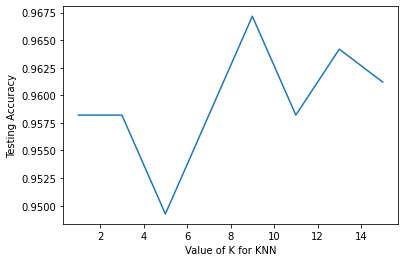

In [ ]:
import matplotlib.pyplot as plt
plt.plot(nn, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
cm

array([[ 60,   3,   0],
       [  6, 234,   0],
       [  0,   4,  28]])

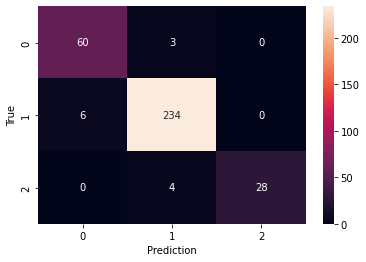

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()

Shuffled Dataset

Berikut adalah dataset yang akan diacak agar bisa menjadi perbandingan antara diacak dengan tidak

In [ ]:
from sklearn.utils import shuffle
Shuffled_data = shuffle(datas, random_state=7)
Shuffled_data

,pm10,so2,co,o3,no2,max,critical,categori
845,70,13,21,81,10,81.0,2,SEDANG
1104,54,17,6,58,7,58.0,2,SEDANG
1377,46,20,5,83,11,83.0,2,SEDANG
203,25,7,11,32,5,32.0,2,BAIK
803,64,30,11,63,11,64.0,3,SEDANG
...,...,...,...,...,...,...,...,...
1742,33,46,4,14,3,46.0,5,BAIK
577,34,8,6,46,3,46.0,2,BAIK
627,42,3,10,52,8,52.0,2,SEDANG
1353,53,20,9,85,5,85.0,0,SEDANG


In [ ]:

def devide_shuffled_data(Shuffled_data, name_colums=['pm10','so2','co','o3','no2','max','critical']):
  ciris = Shuffled_data[name_colums]
  labels = Shuffled_data[['categori']]
  return ciris,labels

ciris,labels = devide_shuffled_data(Shuffled_data)
Ciri_trains, Ciri_tests, Label_trains, Label_tests = train_test_split(ciris, labels, test_size = 0.50, random_state=4)

shuffled_nn = 1
end_shuffled = 15
nn_ =[]
scores_ = []

for i in range(shuffled_nn, end_shuffled+1):
  if i % 2 != 0:
    nn_.append(i)
for k in nn_:
  classifier_ = KNeighborsClassifier(n_neighbors = k, metric='minkowski', p=2)
  classifier_.fit(Ciri_trains, Label_trains.values.ravel())
  Preds = classifier.predict(Ciri_tests)
  scores_.append(metrics.accuracy_score(Label_tests, Preds))

for s in range(0, len(nn_)):
  print(f"Dengan {nn_[s]}-nn mendapatkan score {scores_[s]}")
  s += 1
cm = confusion_matrix(Label_tests, Preds)

Dengan 1-nn mendapatkan score 0.961768219832736
Dengan 3-nn mendapatkan score 0.961768219832736
Dengan 5-nn mendapatkan score 0.961768219832736
Dengan 7-nn mendapatkan score 0.961768219832736
Dengan 9-nn mendapatkan score 0.961768219832736
Dengan 11-nn mendapatkan score 0.961768219832736
Dengan 13-nn mendapatkan score 0.961768219832736
Dengan 15-nn mendapatkan score 0.961768219832736


Text(0, 0.5, 'Testing Accuracy')

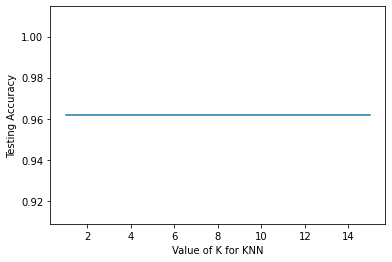

In [ ]:
import matplotlib.pyplot as plt
plt.plot(nn_, scores_)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
Ciri_tests

,pm10,so2,co,o3,no2,max,critical
285,72,17,45,77,10,77.0,2
1793,25,34,7,33,3,34.0,4
949,60,18,12,102,11,102.0,2
1376,52,20,5,68,13,68.0,2
1203,57,16,23,59,11,59.0,2
...,...,...,...,...,...,...,...
256,74,26,47,191,7,191.0,2
1180,72,32,17,64,10,72.0,3
1291,56,25,13,98,7,101.0,4
1120,66,26,9,59,17,66.0,3


In [ ]:
Label_tests

,categori
285,SEDANG
1793,BAIK
949,TIDAK SEHAT
1376,SEDANG
1203,SEDANG
...,...
256,TIDAK SEHAT
1180,SEDANG
1291,TIDAK SEHAT
1120,SEDANG


In [ ]:
from sklearn.model_selection import cross_val_score

folds = [5, 10, 15, 20]
for f in folds:
  scores_cross_val = cross_val_score(classifier_,ciris,labels.values.ravel(), cv = f)
  scores_cross_val_unshuffled = cross_val_score(classifier,ciri,label.values.ravel(),cv=f)

In [ ]:
for sc in range(0, len(folds)):
  print(f"Cross-Validation scores dengan folds {folds[sc]} adalah {scores_cross_val[sc]}")
  sc += 1

Cross-Validation scores dengan folds 5 adalah 0.9642857142857143
Cross-Validation scores dengan folds 10 adalah 0.9523809523809523
Cross-Validation scores dengan folds 15 adalah 0.9642857142857143
Cross-Validation scores dengan folds 20 adalah 0.9523809523809523


In [ ]:
scores_cross_val.mean()

0.9522088353413656

In [ ]:
for sc in range(0, len(folds)):
  print(f"Cross-Validation scores dengan folds {folds[sc]} adalah {scores_cross_val_unshuffled[sc]}")
  sc += 1

Cross-Validation scores dengan folds 5 adalah 0.9642857142857143
Cross-Validation scores dengan folds 10 adalah 0.8809523809523809
Cross-Validation scores dengan folds 15 adalah 0.7738095238095238
Cross-Validation scores dengan folds 20 adalah 0.8452380952380952


In [ ]:
scores_cross_val_unshuffled.mean()

0.9253585771658063